In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet


Importing plotly failed. Interactive plots will not work.


# Forecasting Model

## Read the Mumbai Uni data

In [2]:
data = pd.read_csv("../data/Mumbai Univ Comp Eng SGPA.csv")
data

Unnamed: 0  SEM-I  SEM-II  SEM-III  SEM-IV  SEM-V  SEM-VI  SEM-VII  \
0              0   8.83    9.70     9.61    9.75   9.13    8.52     8.36   
1              1   9.00    9.25     9.09    9.50   8.30    7.83     7.09   
2              2   6.33    7.60     9.09    9.67   9.30    7.57     8.36   
3              3   6.47    7.10     8.83    9.58   9.26    8.09     7.82   
4              4   7.11    7.28     8.96    9.67   9.04    7.57     8.09   
...          ...    ...     ...      ...     ...    ...     ...      ...   
3198        3854   8.72    9.80     9.74    9.58   8.96    8.22     7.73   
3199        3855   6.44    5.78     7.52    8.00   8.13    6.57     6.86   
3200        3856   7.69    9.23     9.87    9.67   9.13    9.35     8.59   
3201        3859   7.50    8.85     8.30    9.38   9.35    8.70     7.27   
3202        3860   7.39    8.85     9.47    8.33   8.91    8.57     7.27   

      SEM-VIII  
0         9.00  
1         7.71  
2         9.29  
3         9.57  
4         8.71  
...        ...  
3198      9.29  
3199      8.29  
3200      9.14  
3201      8.57  
3202      8.14  

[3203 rows x 9 columns]

In [3]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
data.head()

SEM-I  SEM-II  SEM-III  SEM-IV  SEM-V  SEM-VI  SEM-VII  SEM-VIII
0   8.83    9.70     9.61    9.75   9.13    8.52     8.36      9.00
1   9.00    9.25     9.09    9.50   8.30    7.83     7.09      7.71
2   6.33    7.60     9.09    9.67   9.30    7.57     8.36      9.29
3   6.47    7.10     8.83    9.58   9.26    8.09     7.82      9.57
4   7.11    7.28     8.96    9.67   9.04    7.57     8.09      8.71

In [5]:
data.describe()

SEM-I       SEM-II      SEM-III       SEM-IV        SEM-V  \
count  3203.000000  3203.000000  3203.000000  3203.000000  3203.000000   
mean      7.629719     8.529063     9.295960     9.468302     9.316581   
std       0.983114     0.986610     0.716817     0.594096     0.621631   
min       4.740000     4.800000     4.920000     5.440000     6.000000   
25%       6.940000     7.800000     8.960000     9.210000     9.000000   
50%       7.560000     8.600000     9.480000     9.670000     9.480000   
75%       8.280000     9.365000     9.870000     9.880000     9.780000   
max      10.000000    10.000000    10.000000    10.000000    10.000000   

            SEM-VI      SEM-VII     SEM-VIII  
count  3203.000000  3203.000000  3203.000000  
mean      8.234839     7.957874     8.532891  
std       0.916079     0.776001     1.070448  
min       4.740000     5.640000     0.000000  
25%       7.570000     7.450000     8.140000  
50%       8.260000     7.950000     8.620000  
75%       8.930000     8.500000     9.140000  
max      10.000000    10.000000     9.950000

In [6]:
(data[data > 9.0].count() / len(data)) * 100

SEM-I        9.178895
SEM-II      36.184827
SEM-III     73.587262
SEM-IV      81.236341
SEM-V       74.586325
SEM-VI      22.041836
SEM-VII      9.491102
SEM-VIII    29.191383
dtype: float64

> ### Note:
> SGPA in mumbai uni data has very high SGPA's not in line with our college. Will find the mean of maximum for each result I have and take the mean to make that the new maximum. 
> My college SGPA's used below are not `pushed` to the `gitlab repo` for `privacy` of students `information`.

## Reading the results

In [7]:
sem4C = pd.read_csv('../data/4C.csv')
sem4C

Unnamed: 0             Unnamed: 1 21MATCS41 21MATCS41.1 21MATCS41.2  \
0          USN                   Name       INT         EXT         TOT   
1   1OX21CS116             ROHAN VATS        46          12          58   
2   1OX21CS117                ROJA MK        49          43          92   
3   1OX21CS118                ROOPA R        50          50         100   
4   1OX21CS119  RUSHIKESH B KATTIMANI        39          32          71   
..         ...                    ...       ...         ...         ...   
74          FC                     13         2          21          14   
75          SC                      3         0           6           4   
76        Fail                     10         0           5           3   
77      Absent                      0         4           1           4   
78       Total                     54        54          54          54   

   21CSL481 21CSL481.1 21CSL481.2 21CS42 21CS42.1  ... 21KBK47.2 21UH49  \
0       INT        EXT        TOT    INT      EXT  ...       TOT    INT   
1        50         50        100     47       22  ...        94     50   
2        49         47         96     45       25  ...        94     50   
3        50         34         84     46       31  ...        96     50   
4        50         46         96     37       31  ...        91     49   
..      ...        ...        ...    ...      ...  ...       ...    ...   
74       16         14          1      4        4  ...       NaN    NaN   
75        3          9          0      4        7  ...       NaN    NaN   
76        4          0          0      0        0  ...       NaN    NaN   
77        3          2          5      0        0  ...       NaN    NaN   
78       54         54         54     54       54  ...       NaN    NaN   

   21UH49.1 21UH49.2 21INT49 21INT49.1 21INT49.2 Unnamed: 32 Unnamed: 33  \
0       EXT      TOT     INT       EXT       TOT       Total  Percentage   
1        36       86      99         0        99         779        77.9   
2        41       91      95         0        95         870          87   
3        41       91      97         0        97         892        89.2   
4        32       81      97         0        97         819        81.9   
..      ...      ...     ...       ...       ...         ...         ...   
74      NaN      NaN     NaN       NaN       NaN         NaN         NaN   
75      NaN      NaN     NaN       NaN       NaN         NaN         NaN   
76      NaN      NaN     NaN       NaN       NaN         NaN         NaN   
77      NaN      NaN     NaN       NaN       NaN         NaN         NaN   
78      NaN      NaN     NaN       NaN       NaN         NaN         NaN   

    Unnamed: 34  
0          SGPA  
1   7.347826087  
2   9.043478261  
3   9.173913043  
4   8.130434783  
..          ...  
74          NaN  
75          NaN  
76          NaN  
77          NaN  
78          NaN  

[79 rows x 35 columns]

In [8]:
sem4C.columns = sem4C.iloc[0]
sem4C = sem4C[1: ]

In [9]:
sem4C['SGPA'] = sem4C['SGPA'].astype(float)
sem4C['SGPA']

1     7.347826
2     9.043478
3     9.173913
4     8.130435
5     9.347826
        ...   
74         NaN
75         NaN
76         NaN
77         NaN
78         NaN
Name: SGPA, Length: 78, dtype: float64

<Axes: xlabel='SGPA'>

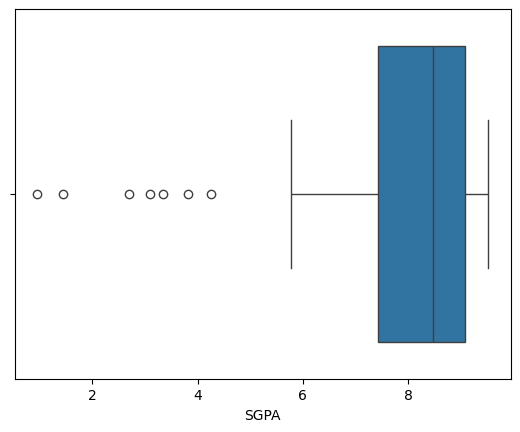

In [10]:
sns.boxplot(data=sem4C['SGPA'], orient='h')

<Axes: xlabel='SGPA', ylabel='Count'>

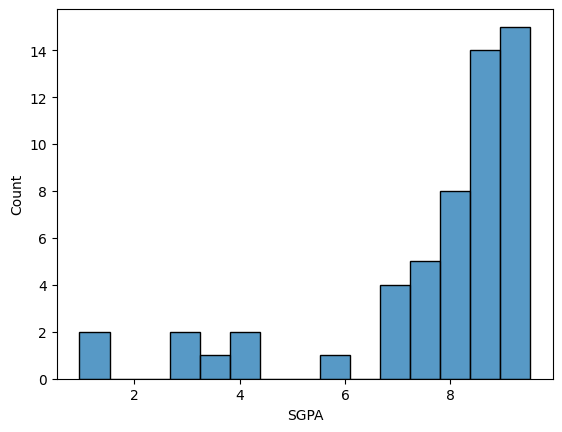

In [11]:
sns.histplot(sem4C['SGPA'], bins=15)

In [12]:
min_4c = sem4C['SGPA'].min()
max_4c = sem4C['SGPA'].max()

In [13]:
min_4c

0.9565217391

In [14]:
max_4c

9.52173913

In [15]:
sem5A = pd.read_csv('../data/5A.csv')
sem5A

Unnamed: 0          Unnamed: 1 21CIV57 21CIV57.1 21CIV57.2 21CS51  \
0            USN                Name     INT       EXT       TOT    INT   
1   : 1OX21CS001        : A R CHETAN      42        30        72     31   
2   : 1OX21CS002     : A S SUDHARANI      45        27        72     48   
3   : 1OX21CS003          : ABHIJEET      44        28        72     34   
4   : 1OX21CS004  : ABHILASH HEBBALE      39        26        65     24   
..           ...                 ...     ...       ...       ...    ...   
83            FC                  20      25        35        29     31   
84            SC                   1       7         5         8      6   
85          Fail                   0       7         5         6      8   
86        Absent                   0       0         0         1      0   
87         Total                  56      56        56        56     56   

   21CS51.1 21CS51.2 21CS52 21CS52.1  ... 21CSL55.2 21CSL581 21CSL581.1  \
0       EXT      TOT    INT      EXT  ...       TOT      INT        EXT   
1        24       55     44       30  ...        77       49         48   
2        18       66     44       25  ...        96       50         48   
3        23       57     44       35  ...        80       50         45   
4        10       34     38       23  ...        57       49         40   
..      ...      ...    ...      ...  ...       ...      ...        ...   
83        6        3     24      173  ...       NaN      NaN        NaN   
84        1        0      5       33  ...       NaN      NaN        NaN   
85        1        1      1       29  ...       NaN      NaN        NaN   
86        0        0      0        1  ...       NaN      NaN        NaN   
87       56       56     56      448  ...       NaN      NaN        NaN   

   21CSL581.2 21RMI56 21RMI56.1 21RMI56.2 Unnamed: 26 Unnamed: 27  Unnamed: 28  
0         TOT     INT       EXT       TOT       Total  Percentage         SGPA  
1          97      45        40        85         600          75  7.722222222  
2          98      48        33        81         624          78  7.777777778  
3          95      46        38        84         614       76.75  7.944444444  
4          89      37        20        57         446       55.75  4.444444444  
..        ...     ...       ...       ...         ...         ...          ...  
83        NaN     NaN       NaN       NaN         NaN         NaN          NaN  
84        NaN     NaN       NaN       NaN         NaN         NaN          NaN  
85        NaN     NaN       NaN       NaN         NaN         NaN          NaN  
86        NaN     NaN       NaN       NaN         NaN         NaN          NaN  
87        NaN     NaN       NaN       NaN         NaN         NaN          NaN  

[88 rows x 29 columns]

In [16]:
sem5A.columns = sem5A.iloc[0]
sem5A = sem5A[1: ]

In [17]:
sem5A

0            USN                Name INT EXT TOT INT EXT TOT INT  EXT  ...  \
1   : 1OX21CS001        : A R CHETAN  42  30  72  31  24  55  44   30  ...   
2   : 1OX21CS002     : A S SUDHARANI  45  27  72  48  18  66  44   25  ...   
3   : 1OX21CS003          : ABHIJEET  44  28  72  34  23  57  44   35  ...   
4   : 1OX21CS004  : ABHILASH HEBBALE  39  26  65  24  10  34  38   23  ...   
5   : 1OX21CS005   : ABHISHEK MAURYA  47  34  81  30  10  40  36   10  ...   
..           ...                 ...  ..  ..  ..  ..  ..  ..  ..  ...  ...   
83            FC                  20  25  35  29  31   6   3  24  173  ...   
84            SC                   1   7   5   8   6   1   0   5   33  ...   
85          Fail                   0   7   5   6   8   1   1   1   29  ...   
86        Absent                   0   0   0   1   0   0   0   0    1  ...   
87         Total                  56  56  56  56  56  56  56  56  448  ...   

0   TOT  INT  EXT  TOT  INT  EXT  TOT Total Percentage         SGPA  
1    77   49   48   97   45   40   85   600         75  7.722222222  
2    96   50   48   98   48   33   81   624         78  7.777777778  
3    80   50   45   95   46   38   84   614      76.75  7.944444444  
4    57   49   40   89   37   20   57   446      55.75  4.444444444  
5    88   50   46   96   32   19   51   485     60.625            5  
..  ...  ...  ...  ...  ...  ...  ...   ...        ...          ...  
83  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN        NaN          NaN  
84  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN        NaN          NaN  
85  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN        NaN          NaN  
86  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN        NaN          NaN  
87  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN        NaN          NaN  

[87 rows x 29 columns]

In [18]:
sem5A['SGPA'] = sem5A['SGPA'].astype(float)

<Axes: xlabel='SGPA'>

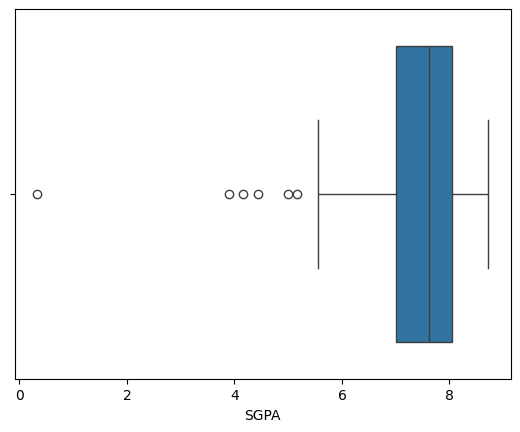

In [19]:
sns.boxplot(sem5A['SGPA'], orient='h')

<Axes: xlabel='SGPA', ylabel='Count'>

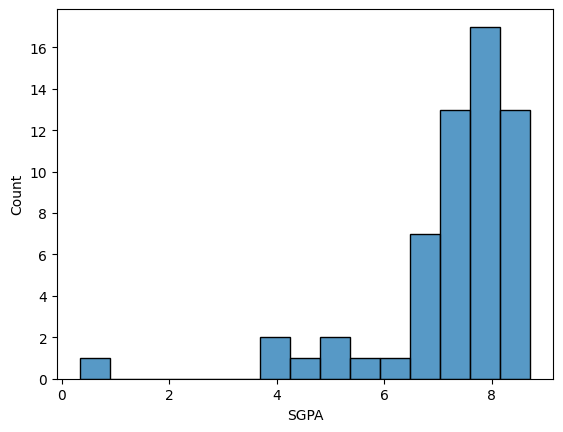

In [20]:
sns.histplot(sem5A['SGPA'], bins=15)

In [21]:
min_5a = sem5A['SGPA'].min()
max_5a = sem5A['SGPA'].max()

In [22]:
min_5a

0.3333333333

In [23]:
max_5a

8.722222222

In [24]:
sem5B = pd.read_csv('../data/5B.csv')
sem5B

Unnamed: 0               Unnamed: 1 21CIV57 21CIV57.1 21CIV57.2 21CS51  \
0            USN                     Name     INT       EXT       TOT    INT   
1   : 1OX21CS059           : JANHVI GUPTA      45        32        77     50   
2   : 1OX21CS060           : JOEL G RAJAN      44        27        71     27   
3   : 1OX21CS061              : K PRATHIK      42        28        70     44   
4   : 1OX21CS062  : KADAPPA MALLAPPA TELI      45        31        76     49   
..           ...                      ...     ...       ...       ...    ...   
75            FC                       37      22        26        25     26   
76            SC                        1       7         7        12      2   
77          Fail                        0       4         5         9      6   
78        Absent                        0       1         0         1      0   
79         Total                       55      55        55        55     55   

   21CS51.1 21CS51.2 21CS52 21CS52.1  ... 21CSL55.2 21CSL581 21CSL581.1  \
0       EXT      TOT    INT      EXT  ...       TOT      INT        EXT   
1        42       92     50       31  ...        94       50         50   
2        10       37     37       12  ...        25       47         42   
3        23       67     43       20  ...        80       50         45   
4        26       75     50       31  ...        98       50         50   
..      ...      ...    ...      ...  ...       ...      ...        ...   
75        7        2     17      162  ...       NaN      NaN        NaN   
76        0        0      7       36  ...       NaN      NaN        NaN   
77        0        0      2       26  ...       NaN      NaN        NaN   
78        1        0      0        3  ...       NaN      NaN        NaN   
79       55       55     55      440  ...       NaN      NaN        NaN   

   21CSL581.2 21RMI56 21RMI56.1 21RMI56.2 Unnamed: 26 Unnamed: 27  Unnamed: 28  
0         TOT     INT       EXT       TOT       Total  Percentage         SGPA  
1         100      50        31        81         679      84.875  8.888888889  
2          89      35        13        48         416          52  3.777777778  
3          95      44        32        76         573      71.625  7.277777778  
4         100      50        37        87         676        84.5  8.722222222  
..        ...     ...       ...       ...         ...         ...          ...  
75        NaN     NaN       NaN       NaN         NaN         NaN          NaN  
76        NaN     NaN       NaN       NaN         NaN         NaN          NaN  
77        NaN     NaN       NaN       NaN         NaN         NaN          NaN  
78        NaN     NaN       NaN       NaN         NaN         NaN          NaN  
79        NaN     NaN       NaN       NaN         NaN         NaN          NaN  

[80 rows x 29 columns]

In [25]:
sem5B.columns = sem5B.iloc[0]
sem5B = sem5B[1: ]

In [26]:
sem5B

0            USN                     Name INT EXT TOT INT EXT TOT INT  EXT  \
1   : 1OX21CS059           : JANHVI GUPTA  45  32  77  50  42  92  50   31   
2   : 1OX21CS060           : JOEL G RAJAN  44  27  71  27  10  37  37   12   
3   : 1OX21CS061              : K PRATHIK  42  28  70  44  23  67  43   20   
4   : 1OX21CS062  : KADAPPA MALLAPPA TELI  45  31  76  49  26  75  50   31   
5   : 1OX21CS063              : KARTHIK M  45  30  75  50  33  83  50   25   
..           ...                      ...  ..  ..  ..  ..  ..  ..  ..  ...   
75            FC                       37  22  26  25  26   7   2  17  162   
76            SC                        1   7   7  12   2   0   0   7   36   
77          Fail                        0   4   5   9   6   0   0   2   26   
78        Absent                        0   1   0   1   0   1   0   0    3   
79         Total                       55  55  55  55  55  55  55  55  440   

0   ...  TOT  INT  EXT  TOT  INT  EXT  TOT Total Percentage         SGPA  
1   ...   94   50   50  100   50   31   81   679     84.875  8.888888889  
2   ...   25   47   42   89   35   13   48   416         52  3.777777778  
3   ...   80   50   45   95   44   32   76   573     71.625  7.277777778  
4   ...   98   50   50  100   50   37   87   676       84.5  8.722222222  
5   ...  100   50   50  100   50   27   77   665     83.125  8.388888889  
..  ...  ...  ...  ...  ...  ...  ...  ...   ...        ...          ...  
75  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN        NaN          NaN  
76  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN        NaN          NaN  
77  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN        NaN          NaN  
78  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN        NaN          NaN  
79  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN        NaN          NaN  

[79 rows x 29 columns]

In [27]:
sem5B['SGPA'] = sem5B['SGPA'].astype(float)

<Axes: xlabel='SGPA'>

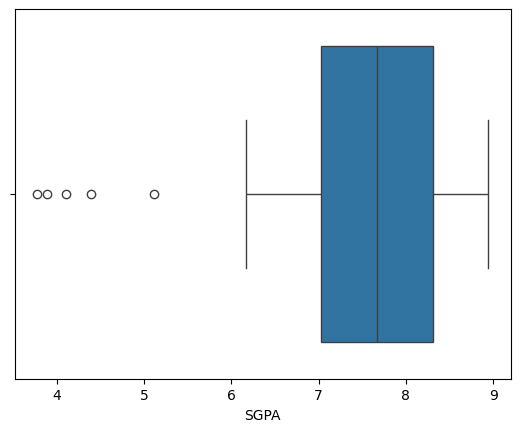

In [28]:
sns.boxplot(sem5B['SGPA'], orient='h')

<Axes: xlabel='SGPA', ylabel='Count'>

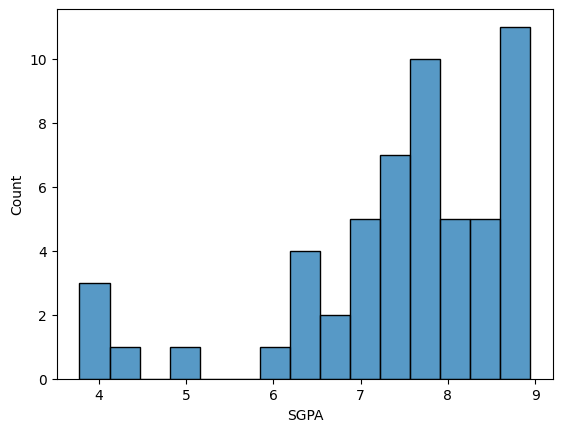

In [29]:
sns.histplot(sem5B['SGPA'],bins=15)

In [30]:
min_5b = sem5B['SGPA'].min()
max_5b = sem5B['SGPA'].max()

In [31]:
min_5b

3.777777778

In [32]:
max_5b

8.944444444

In [33]:
sem5C = pd.read_csv('../data/5C.csv')
sem5C

Unnamed: 0               Unnamed: 1 21CIV57 21CIV57.1 21CIV57.2 21CS51  \
0            USN                     Name     INT       EXT       TOT    INT   
1   : 1OX21CS116             : ROHAN VATS      44        33        77     46   
2   : 1OX21CS117                : ROJA MK      45        32        77     50   
3   : 1OX21CS118                : ROOPA R      48        31        79     50   
4   : 1OX21CS119  : RUSHIKESH B KATTIMANI      38        33        71     48   
..           ...                      ...     ...       ...       ...    ...   
74            FC                       26      16        21        29     25   
75            SC                        6       6         4         6      3   
76          Fail                        0       3         5         3      3   
77        Absent                        1       5         4         2      3   
78         Total                       54      54        54        54     54   

   21CS51.1 21CS51.2 21CS52 21CS52.1  ... 21CSL55.2 21CSL581 21CSL581.1  \
0       EXT      TOT    INT      EXT  ...       TOT      INT        EXT   
1        26       72     41       10  ...        99       50         50   
2        29       79     48       31  ...        94       50         49   
3        36       86     50       39  ...        99       50         50   
4        18       66     41       30  ...        93       48         50   
..      ...      ...    ...      ...  ...       ...      ...        ...   
74        2        2     10      131  ...       NaN      NaN        NaN   
75        0        1      4       30  ...       NaN      NaN        NaN   
76        1        0      1       16  ...       NaN      NaN        NaN   
77        2        2      3       22  ...       NaN      NaN        NaN   
78       54       54     54      432  ...       NaN      NaN        NaN   

   21CSL581.2 21RMI56 21RMI56.1 21RMI56.2 Unnamed: 26 Unnamed: 27  Unnamed: 28  
0         TOT     INT       EXT       TOT       Total  Percentage         SGPA  
1         100      40        25        65         581      72.625  7.166666667  
2          99      50        39        89         668        83.5  8.333333333  
3         100      50        38        88         693      86.625  8.722222222  
4          98      45        21        66         588        73.5  7.611111111  
..        ...     ...       ...       ...         ...         ...          ...  
74        NaN     NaN       NaN       NaN         NaN         NaN          NaN  
75        NaN     NaN       NaN       NaN         NaN         NaN          NaN  
76        NaN     NaN       NaN       NaN         NaN         NaN          NaN  
77        NaN     NaN       NaN       NaN         NaN         NaN          NaN  
78        NaN     NaN       NaN       NaN         NaN         NaN          NaN  

[79 rows x 29 columns]

In [34]:
sem5C.columns = sem5C.iloc[0]
sem5C = sem5C[1: ]

In [35]:
sem5C['SGPA'] = sem5C['SGPA'].astype(float)

<Axes: xlabel='SGPA'>

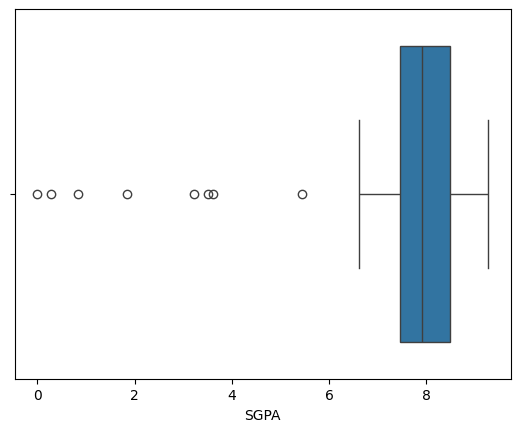

In [36]:
sns.boxplot(sem5C['SGPA'], orient='h')

<Axes: xlabel='SGPA', ylabel='Count'>

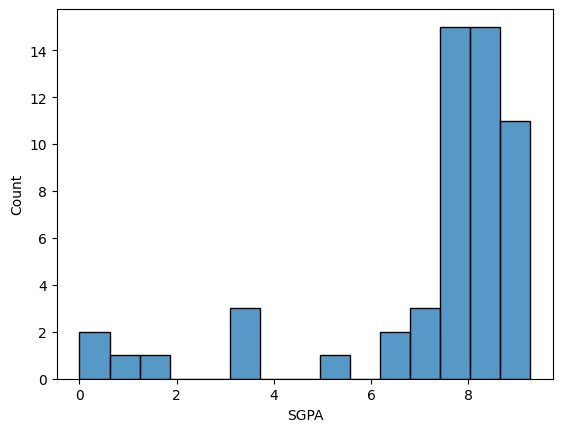

In [37]:
sns.histplot(sem5C['SGPA'],bins=15)

In [38]:
min_5c = sem5C['SGPA'].min()
max_5c = sem5C['SGPA'].max()

In [39]:
min_5c

0.0

In [40]:
max_5c

9.277777778

> ### Note:
> - Went with finding `min` and `max` to perform `min-max normalization` to scale the `SGPA down` to a range that represents my `college SGPA's`
> <br>
> <br>
> `formula`: Normalized SGPA = [(SGPA - Minimum SGPA) / Range] * New Range + New Minimum

In [46]:
new_min = (min_4c + min_5a + min_5b + min_5c) / 4
new_min

1.2669082126

In [47]:
new_max = max(max_5c, max_4c, max_5a, max_5b)
new_max

9.52173913

In [43]:
(data[data > 9.0].count() / len(data)) * 100

SEM-I        9.178895
SEM-II      36.184827
SEM-III     73.587262
SEM-IV      81.236341
SEM-V       74.586325
SEM-VI      22.041836
SEM-VII      9.491102
SEM-VIII    29.191383
dtype: float64

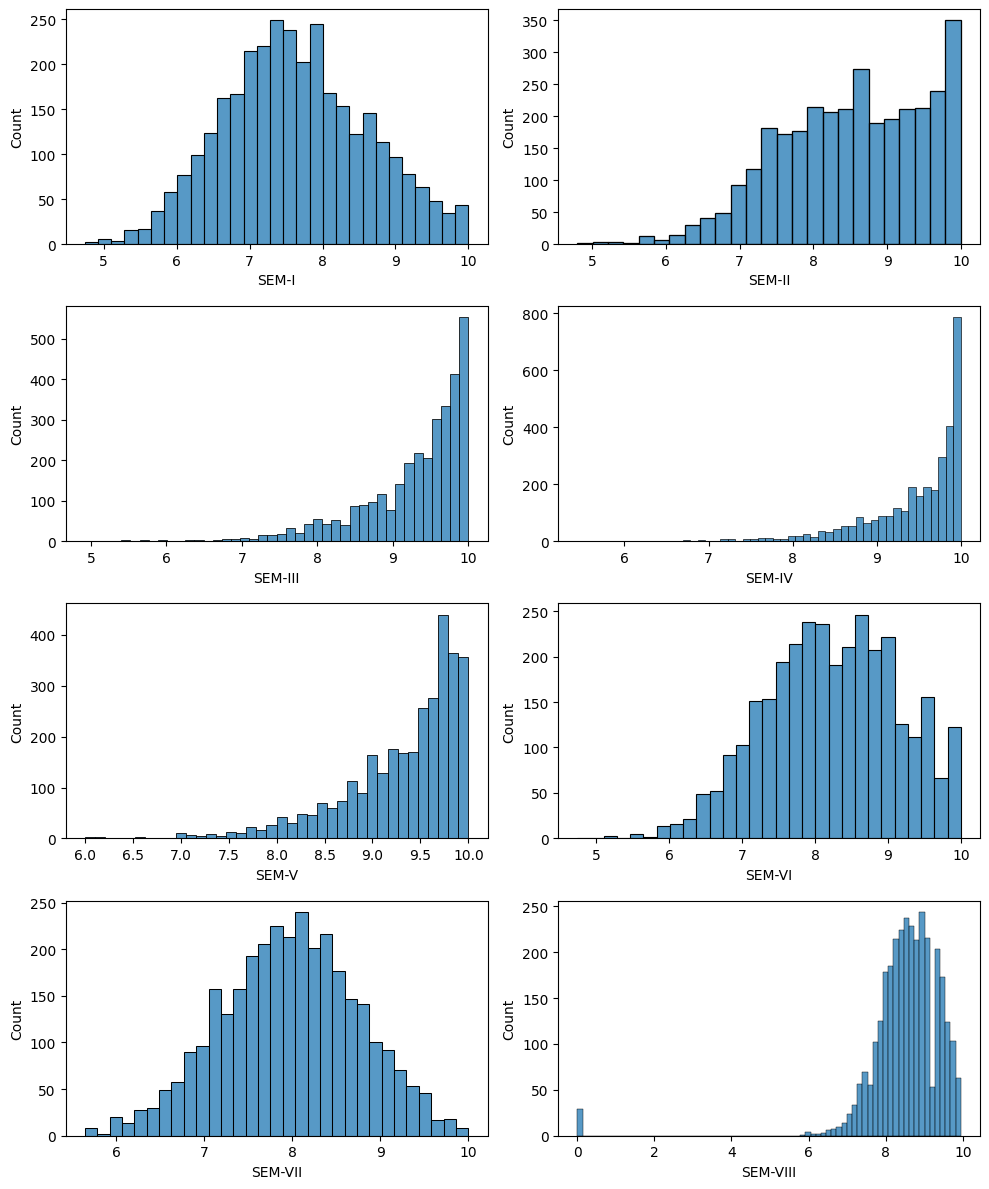

In [44]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))

sns.histplot(data['SEM-I'], ax=axes[0,0])
sns.histplot(data['SEM-II'], ax=axes[0,1])
sns.histplot(data['SEM-III'], ax=axes[1,0])
sns.histplot(data['SEM-IV'], ax=axes[1,1])
sns.histplot(data['SEM-V'], ax=axes[2,0])
sns.histplot(data['SEM-VI'], ax=axes[2,1])
sns.histplot(data['SEM-VII'], ax=axes[3,0])
sns.histplot(data['SEM-VIII'], ax=axes[3,1])

plt.tight_layout()
plt.show()

#### I wanna try and `normalize` all the columns with the mean of my college eventhough only some of the semesters have high percentage of SGPA's > 9.0

In [51]:
def normalize(sgpa, old_max, old_min, new_max, new_min):
    old_range = old_max - old_min
    new_range = new_max - new_min
    new_sgpa = ((sgpa - old_min) / old_range) * new_range + new_min
    return new_sgpa.round(2)

In [52]:
normalize_vect = np.vectorize(normalize)

In [54]:
data['NEW-SEM-I'] = normalize_vect(data['SEM-I'], old_max=data['SEM-I'].max(), old_min=data['SEM-I'].min(), new_max=new_max, new_min=new_min)
data['NEW-SEM-II'] = normalize_vect(data['SEM-II'], old_max=data['SEM-II'].max(), old_min=data['SEM-II'].min(), new_max=new_max, new_min=new_min)
data['NEW-SEM-III'] = normalize_vect(data['SEM-III'], old_max=data['SEM-III'].max(), old_min=data['SEM-III'].min(), new_max=new_max, new_min=new_min)
data['NEW-SEM-IV'] = normalize_vect(data['SEM-IV'], old_max=data['SEM-IV'].max(), old_min=data['SEM-IV'].min(), new_max=new_max, new_min=new_min)
data['NEW-SEM-V'] = normalize_vect(data['SEM-V'], old_max=data['SEM-V'].max(), old_min=data['SEM-V'].min(), new_max=new_max, new_min=new_min)
data['NEW-SEM-VI'] = normalize_vect(data['SEM-VI'], old_max=data['SEM-VI'].max(), old_min=data['SEM-VI'].min(), new_max=new_max, new_min=new_min)
data['NEW-SEM-VII'] = normalize_vect(data['SEM-VII'], old_max=data['SEM-VII'].max(), old_min=data['SEM-VII'].min(), new_max=new_max, new_min=new_min)
data['NEW-SEM-VIII'] = normalize_vect(data['SEM-VIII'], old_max=data['SEM-VIII'].max(), old_min=data['SEM-VIII'].min(), new_max=new_max, new_min=new_min)

> ### Note:
> I'm not quite satisfied with what SGPA's I got after `normalizing` the them, as all the semesters now have the range of `1.27 - 9.52`. But this is `not` what I `intended`, I just want to `decrease` the SGPA's in the dataset in such a way that they `represent` the `same trend` but with a `lesser SGPA`.

In [56]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(data):
    # Drop column: 'NEW-SEM-I'
    data = data.drop(columns=['NEW-SEM-I'])
    # Drop column: 'NEW-SEM-II'
    data = data.drop(columns=['NEW-SEM-II'])
    # Drop column: 'NEW-SEM-III'
    data = data.drop(columns=['NEW-SEM-III'])
    # Drop column: 'NEW-SEM-IV'
    data = data.drop(columns=['NEW-SEM-IV'])
    # Drop column: 'NEW-SEM-V'
    data = data.drop(columns=['NEW-SEM-V'])
    # Drop column: 'NEW-SEM-VI'
    data = data.drop(columns=['NEW-SEM-VI'])
    # Drop column: 'NEW-SEM-VII'
    data = data.drop(columns=['NEW-SEM-VII'])
    # Drop column: 'NEW-SEM-VIII'
    data = data.drop(columns=['NEW-SEM-VIII'])
    return data

data = clean_data(data.copy())
data.head()

SEM-I  SEM-II  SEM-III  SEM-IV  SEM-V  SEM-VI  SEM-VII  SEM-VIII
0   8.83    9.70     9.61    9.75   9.13    8.52     8.36      9.00
1   9.00    9.25     9.09    9.50   8.30    7.83     7.09      7.71
2   6.33    7.60     9.09    9.67   9.30    7.57     8.36      9.29
3   6.47    7.10     8.83    9.58   9.26    8.09     7.82      9.57
4   7.11    7.28     8.96    9.67   9.04    7.57     8.09      8.71

### Since we want to `decrease` the SGPA's by a `percentage` or `propotion` let's `calculate` the `percentage decrease` from the `max` of the column to the `new_max` we have and decrease `all sgpa's` by this percentage.

In [65]:
def decrease_sgpa(sgpa, percentage):
    new_sgpa = sgpa - ((percentage / 100) * sgpa)
    if new_sgpa < 0.0:
        return 0.0
    return new_sgpa.round(2)

In [66]:
decrease_sgpa_vect = np.vectorize(decrease_sgpa)

In [69]:
new_data = pd.DataFrame()

In [71]:
percentage = (((data['SEM-I'].max() - new_max) / data['SEM-I'].max()) * 100.0).round(2)
new_data['SEM-I'] = decrease_sgpa_vect(data['SEM-I'], percentage)
percentage = (((data['SEM-II'].max() - new_max) / data['SEM-II'].max()) * 100.0).round(2)
new_data['SEM-II'] = decrease_sgpa_vect(data['SEM-II'], percentage)
percentage = (((data['SEM-III'].max() - new_max) / data['SEM-III'].max()) * 100.0).round(2)
new_data['SEM-III'] = decrease_sgpa_vect(data['SEM-III'], percentage)
percentage = (((data['SEM-IV'].max() - new_max) / data['SEM-IV'].max()) * 100.0).round(2)
new_data['SEM-IV'] = decrease_sgpa_vect(data['SEM-IV'], percentage)
percentage = (((data['SEM-V'].max() - new_max) / data['SEM-V'].max()) * 100.0).round(2)
new_data['SEM-V'] = decrease_sgpa_vect(data['SEM-V'], percentage)
percentage = (((data['SEM-VI'].max() - new_max) / data['SEM-VI'].max()) * 100.0).round(2)
new_data['SEM-VI'] = decrease_sgpa_vect(data['SEM-VI'], percentage)
percentage = (((data['SEM-VII'].max() - new_max) / data['SEM-VII'].max()) * 100.0).round(2)
new_data['SEM-VII'] = decrease_sgpa_vect(data['SEM-VII'], percentage)
percentage = (((data['SEM-VIII'].max() - new_max) / data['SEM-VIII'].max()) * 100.0).round(2)
new_data['SEM-VIII'] = decrease_sgpa_vect(data['SEM-VIII'], percentage)


In [72]:
new_data.head()

SEM-I  SEM-II  SEM-III  SEM-IV  SEM-V  SEM-VI  SEM-VII  SEM-VIII
0   8.41    9.24     9.15    9.28   8.69    8.11     7.96      8.61
1   8.57    8.81     8.66    9.05   7.90    7.46     6.75      7.38
2   6.03    7.24     8.66    9.21   8.86    7.21     7.96      8.89
3   6.16    6.76     8.41    9.12   8.82    7.70     7.45      9.16
4   6.77    6.93     8.53    9.21   8.61    7.21     7.70      8.34

In [74]:
new_data.to_csv('../data/New_SGPAs.csv', index=False)

## Building the model

In [75]:
df = pd.read_csv('../data/New_SGPAs.csv')
df

SEM-I  SEM-II  SEM-III  SEM-IV  SEM-V  SEM-VI  SEM-VII  SEM-VIII
0      8.41    9.24     9.15    9.28   8.69    8.11     7.96      8.61
1      8.57    8.81     8.66    9.05   7.90    7.46     6.75      7.38
2      6.03    7.24     8.66    9.21   8.86    7.21     7.96      8.89
3      6.16    6.76     8.41    9.12   8.82    7.70     7.45      9.16
4      6.77    6.93     8.53    9.21   8.61    7.21     7.70      8.34
...     ...     ...      ...     ...    ...     ...      ...       ...
3198   8.30    9.33     9.27    9.12   8.53    7.83     7.36      8.89
3199   6.13    5.50     7.16    7.62   7.74    6.26     6.53      7.93
3200   7.32    8.79     9.40    9.21   8.69    8.90     8.18      8.75
3201   7.14    8.43     7.90    8.93   8.90    8.28     6.92      8.20
3202   7.04    8.43     9.02    7.93   8.48    8.16     6.92      7.79

[3203 rows x 8 columns]

> ### Just Following the steps to transform the dataframe for prophet from ChatGPT

Step-1: Melt the dataframe

In [78]:
df_long = df.melt(var_name='Semester', value_name='SGPA')
df_long.head()

Semester  SGPA
0    SEM-I  8.41
1    SEM-I  8.57
2    SEM-I  6.03
3    SEM-I  6.16
4    SEM-I  6.77

Step-2: Create a mapping for semesters to dates

In [79]:
semester_dates = {
    'SEM-I': '2020-01-01',
    'SEM-II': '2020-07-01',
    'SEM-III': '2021-01-01',
    'SEM-IV': '2021-07-01',
    'SEM-V': '2022-01-01',
    'SEM-VI': '2022-07-01',
    'SEM-VII': '2023-01-01',
    'SEM-VIII': '2023-07-01'
}

Step-3: Assign dates to the long dataframe

In [80]:
df_long['Date'] = df_long['Semester'].map(semester_dates)
df_long['Date'] = pd.to_datetime(df_long['Date'])

In [81]:
df_long.head()

Semester  SGPA       Date
0    SEM-I  8.41 2020-01-01
1    SEM-I  8.57 2020-01-01
2    SEM-I  6.03 2020-01-01
3    SEM-I  6.16 2020-01-01
4    SEM-I  6.77 2020-01-01

Step-4: Rename columns

In [82]:
prophet_df = df_long.rename(
    columns={
        'Date': 'ds',
        'SGPA': 'y'
    }
)

In [83]:
prophet_df.head()

Semester     y         ds
0    SEM-I  8.41 2020-01-01
1    SEM-I  8.57 2020-01-01
2    SEM-I  6.03 2020-01-01
3    SEM-I  6.16 2020-01-01
4    SEM-I  6.77 2020-01-01

### Initializing the model

In [84]:
model = Prophet()
model.fit(prophet_df)

20:18:34 - cmdstanpy - INFO - Chain [1] start processing
20:18:42 - cmdstanpy - INFO - Chain [1] done processing


In [85]:
future = model.make_future_dataframe(periods=8, freq='6M')
forecast = model.predict(future)

In [86]:
forecast

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2020-01-01   8.303487    6.290580    8.379000     8.303487     8.303487   
1  2020-07-01   8.749248    7.084923    9.319734     8.749248     8.749248   
2  2021-01-01   9.199947    7.809962    9.890685     9.199947     9.199947   
3  2021-07-01   9.643295    7.979480   10.028873     9.643295     9.643295   
4  2022-01-01   9.444994    7.864828    9.896008     9.444994     9.444994   
5  2022-07-01   8.484424    6.732204    8.948352     8.484424     8.484424   
6  2023-01-01   8.389194    6.512222    8.601427     8.389194     8.389194   
7  2023-07-01   8.808057    7.231787    9.235786     8.808057     8.808057   
8  2023-07-31   8.877482    7.508222    9.588761     8.783352     8.972620   
9  2024-01-31   9.303287    6.139541    8.366477     8.985740     9.622211   
10 2024-07-31   9.724463    8.194755   10.656989     9.118070    10.327667   
11 2025-01-31  10.150268    6.503083    9.376280     9.206923    11.093051   
12 2025-07-31  10.569131    8.569693   11.899240     9.251108    11.916856   
13 2026-01-31  10.994936    6.750603   10.961480     9.243184    12.808498   
14 2026-07-31  11.413799    8.649186   13.541679     9.261294    13.658466   
15 2027-01-31  11.839604    6.855335   12.543881     9.215293    14.551085   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
0        -1.039601             -1.039601             -1.039601 -1.039601   
1        -0.625124             -0.625124             -0.625124 -0.625124   
2        -0.346489             -0.346489             -0.346489 -0.346489   
3        -0.632386             -0.632386             -0.632386 -0.632386   
4        -0.578016             -0.578016             -0.578016 -0.578016   
5        -0.638841             -0.638841             -0.638841 -0.638841   
6        -0.809146             -0.809146             -0.809146 -0.809146   
7        -0.644455             -0.644455             -0.644455 -0.644455   
8        -0.333301             -0.333301             -0.333301 -0.333301   
9        -2.019623             -2.019623             -2.019623 -2.019623   
10       -0.289184             -0.289184             -0.289184 -0.289184   
11       -2.228946             -2.228946             -2.228946 -2.228946   
12       -0.304659             -0.304659             -0.304659 -0.304659   
13       -2.164355             -2.164355             -2.164355 -2.164355   
14       -0.319371             -0.319371             -0.319371 -0.319371   
15       -2.094566             -2.094566             -2.094566 -2.094566   

    yearly_lower  yearly_upper  multiplicative_terms  \
0      -1.039601     -1.039601                   0.0   
1      -0.625124     -0.625124                   0.0   
2      -0.346489     -0.346489                   0.0   
3      -0.632386     -0.632386                   0.0   
4      -0.578016     -0.578016                   0.0   
5      -0.638841     -0.638841                   0.0   
6      -0.809146     -0.809146                   0.0   
7      -0.644455     -0.644455                   0.0   
8      -0.333301     -0.333301                   0.0   
9      -2.019623     -2.019623                   0.0   
10     -0.289184     -0.289184                   0.0   
11     -2.228946     -2.228946                   0.0   
12     -0.304659     -0.304659                   0.0   
13     -2.164355     -2.164355                   0.0   
14     -0.319371     -0.319371                   0.0   
15     -2.094566     -2.094566                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                          0.0                         0.0   7.263886  
1                          0.0                         0.0   8.124124  
2                          0.0                         0.0   8.853458  
3                          0.0                         0.0   9.010908  
4                          0.0                         0.0   8.866978  
5     

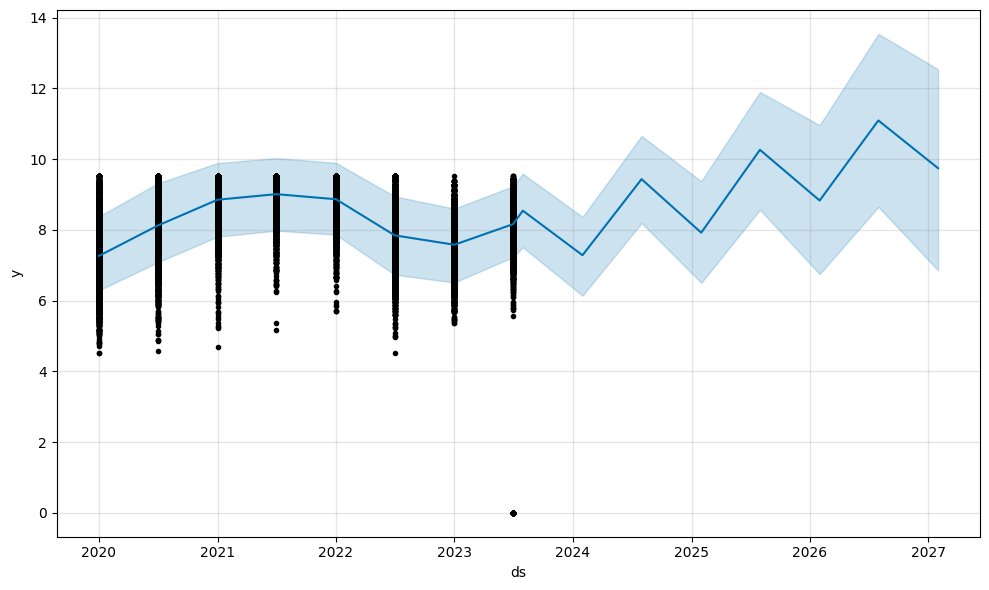

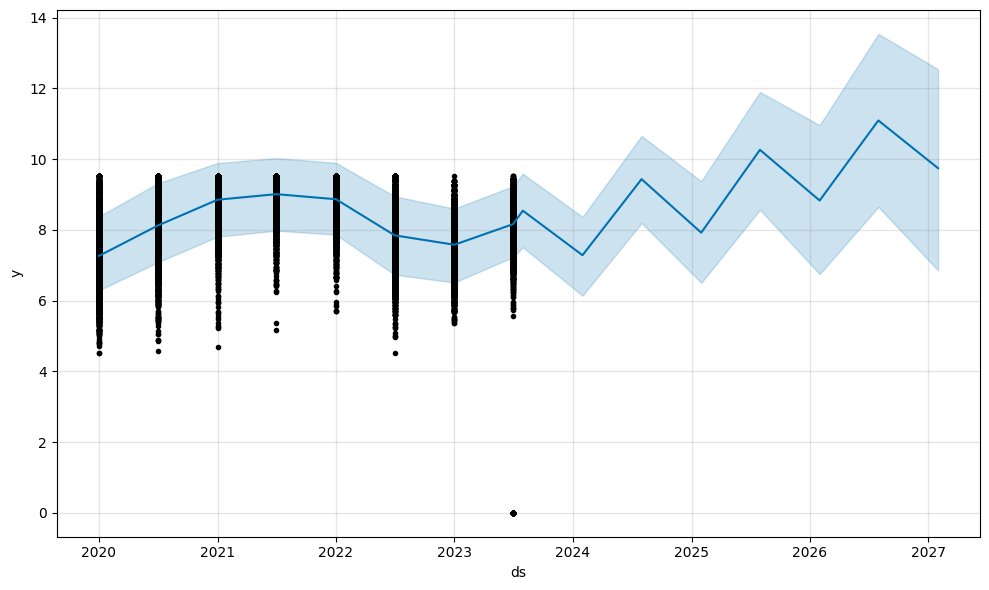

In [87]:
model.plot(forecast)

#### Decided `not` to go with `prophet` because prophet can only give you `forecasting` for `fixed intervals`. It can't handle `variable` inputs like how I want, it expects to be trained for `every variable` input I give.

-----